In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("./Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<h2>Histogram for each feature in the dataset to illustrate the feature distributions considering only numeric values</h2>

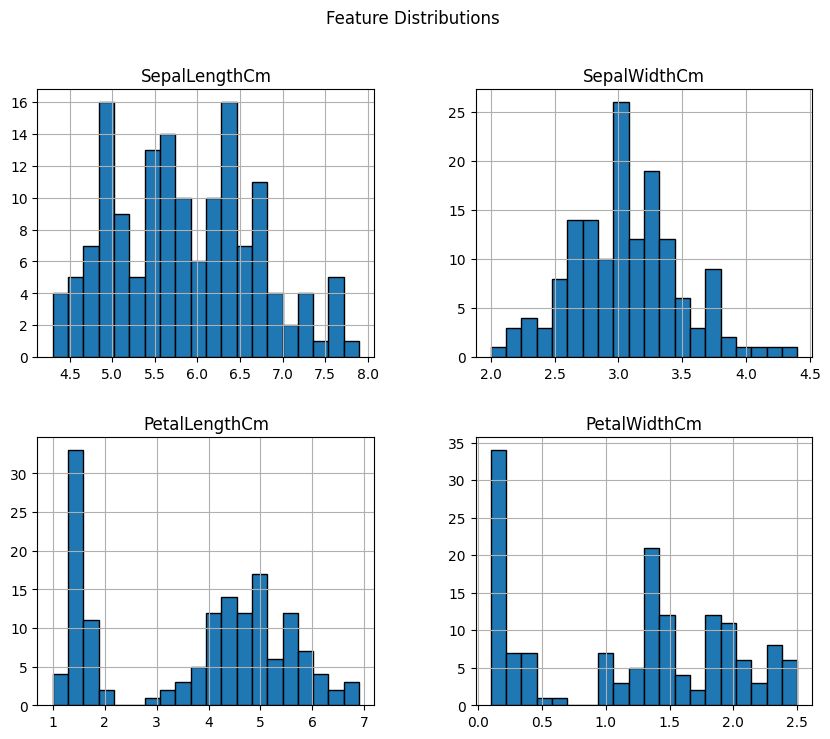

Observation: 

Sepal Length & Width:
- Sepal length follows a slightly skewed normal distribution.
- Sepal width has a more varied distribution, with a slight skew and a peak around 3 cm.

Petal Length & Width:
- Petal length and width are highly skewed, with a distinct separation likely due to different species.
- There are clear gaps in the distributions, suggesting that petal features vary significantly among species.

Therefore the distributions indicate that petal dimensions are stronger distinguishing factors between species compared to sepal dimensions.



In [ ]:
df.drop(columns=['Id']).hist(figsize=(10, 8), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()
print("""Observation:

Sepal Length & Width:
- Sepal length follows a slightly skewed normal distribution.
- Sepal width has a more varied distribution, with a slight skew and a peak around 3 cm.

Petal Length & Width:
- Petal length and width are highly skewed, with a distinct separation likely due to different species.
- There are clear gaps in the distributions, suggesting that petal features vary significantly among species.

Therefore the distributions indicate that petal dimensions are stronger distinguishing factors between species compared to sepal dimensions.
""")


<h2>Histogram for each feature in the dataset to illustrate the feature distributions considering only numeric values on the basis of different species</h2>

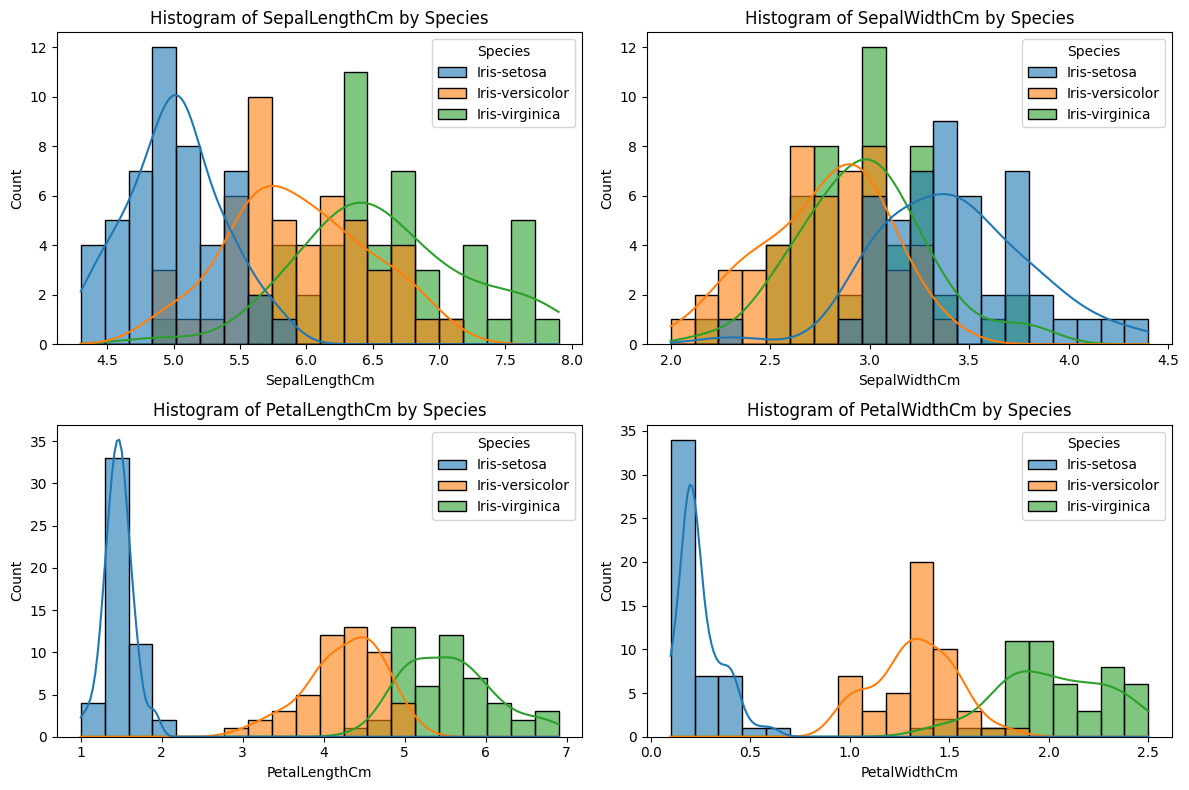

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('Id')

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=df, x=col, hue='Species', kde=True, bins=20, alpha=0.6)
    plt.title(f"Histogram of {col} by Species")

plt.tight_layout()
plt.show()
print("""Observation:

""")

<h2>Histogram for each feature in the dataset to illustrate the feature distributions considering only numeric values.</h2>

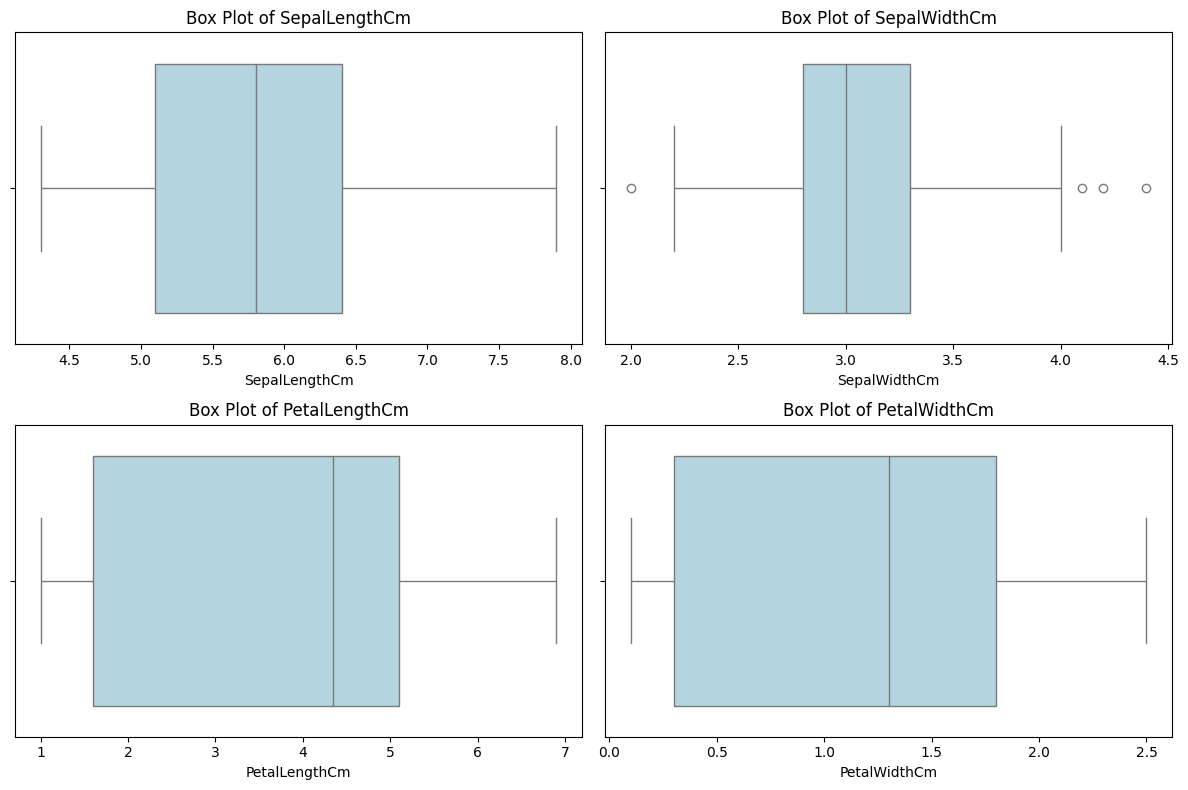

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Id'])

# Create box plots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

<h2>Boxplot for each feature in the dataset to illustrate the feature distributions considering only numeric values on the basis of different species</h2>

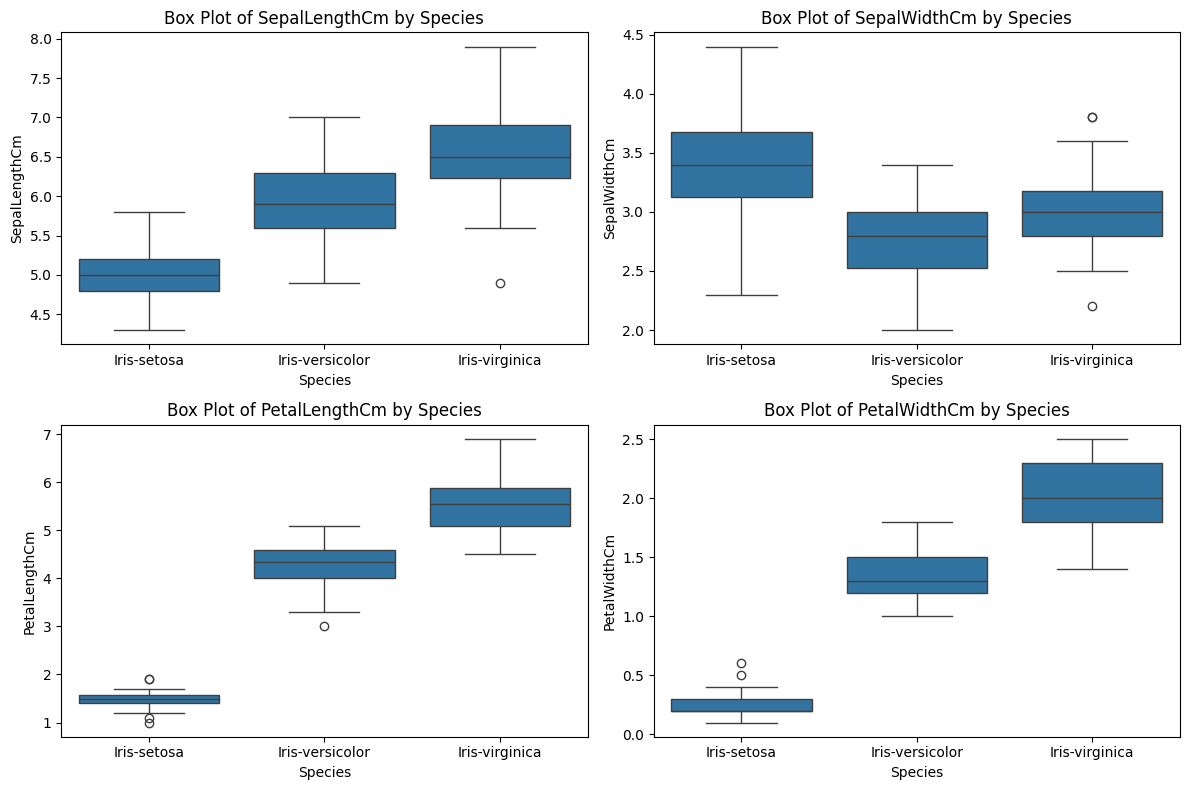

In [ ]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Id'])

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Species', y=col, data=df)
    plt.title(f"Box Plot of {col} by Species")

plt.tight_layout()
plt.show()


<h2>Outliers detection</h2>

In [ ]:
#eric_df = df.drop(columns=["Id", "Species"])
Q1  Compute IQR for numerical columns (excluding 'Id' and 'Species')
num= numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = numeric_df[(numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))]

# Print non-empty outliers
print("Outlier values per feature:")
print(outliers.dropna(how='all'))  # Remove rows with no outliers

Outlier values per feature:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
15            NaN           4.4            NaN           NaN
32            NaN           4.1            NaN           NaN
33            NaN           4.2            NaN           NaN
60            NaN           2.0            NaN           NaN
